In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

from minigrad.engine import Value
from minigrad.loss import BCELoss, CategoricalCrossEntropyLoss
from minigrad.nn import MLP
from minigrad.optim import SGD, ADAGrad, RMSProp, ADAM

(1797, 64)


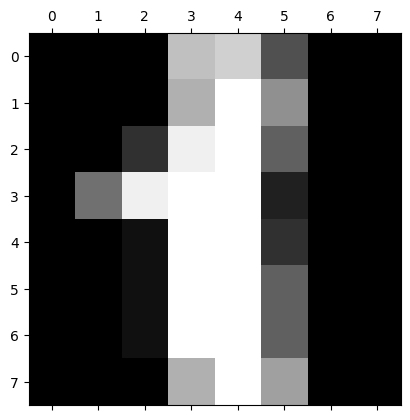

In [2]:
digits = load_digits()
print(digits.data.shape)

plt.matshow(digits.images[1], cmap='gray')

X = pd.DataFrame(digits.data, columns=digits.feature_names)
y = pd.DataFrame(digits.target, columns=['TARGET'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8, shuffle=True, stratify=y)

In [3]:
classifier = MLP(
    nin=len(X_train.columns),
    nouts=[16, len(digits.target_names)],
    activation='tanh'
)

# setup hyperparameters
epochs = 10

# setup loss function and optimizer
cce_loss = CategoricalCrossEntropyLoss()
optimizer = SGD(
    params=classifier.parameters()
)

actuals = [
    [1 if i == actual else 0 for i in range(10)]
    for actual in y_train.TARGET.values
]

epoch_to_params = {}
for e in tqdm(range(epochs), total=epochs):
# for e in range(epochs):
    # forward pass
    ypreds = [classifier(x.values) for _, x in X_train.iterrows()]
    loss = cce_loss(actuals, ypreds)

    # zero grad
    classifier.zero_grad()

    # backward prop
    loss.backward()

    # recalculate the new values for all parameters - optimizer.step()
    optimizer.step()

    epoch_to_params.update({
        e: classifier.parameters()
    })

    print(f'Epoch: {e}, Loss: {loss}')

 10%|█         | 1/10 [00:40<06:07, 40.87s/it]

Epoch: 0, Loss: Value(data=2.4122930652235324, grad=1, label=)


 20%|██        | 2/10 [01:48<07:33, 56.75s/it]

Epoch: 1, Loss: Value(data=2.2534885267534057, grad=1, label=)


 30%|███       | 3/10 [03:46<09:51, 84.57s/it]

Epoch: 2, Loss: Value(data=2.048507499514049, grad=1, label=)


 40%|████      | 4/10 [05:49<09:58, 99.75s/it]

Epoch: 3, Loss: Value(data=1.906397722338103, grad=1, label=)


 50%|█████     | 5/10 [08:01<09:16, 111.29s/it]

Epoch: 4, Loss: Value(data=1.7055477093904836, grad=1, label=)


 60%|██████    | 6/10 [09:45<07:15, 108.86s/it]

Epoch: 5, Loss: Value(data=1.5939184731571026, grad=1, label=)


 70%|███████   | 7/10 [11:58<05:50, 116.90s/it]

Epoch: 6, Loss: Value(data=1.4742956762506676, grad=1, label=)


 80%|████████  | 8/10 [13:41<03:45, 112.52s/it]

Epoch: 7, Loss: Value(data=1.3647230513909152, grad=1, label=)


 90%|█████████ | 9/10 [15:51<01:57, 117.89s/it]

Epoch: 8, Loss: Value(data=1.2547087670182644, grad=1, label=)


100%|██████████| 10/10 [17:34<00:00, 105.49s/it]

Epoch: 9, Loss: Value(data=1.147235913297542, grad=1, label=)


In [4]:
all_res = list()
for counter in range(len(X_test)):
    pred = sorted(
        [(cnt, val) for cnt, val in enumerate(classifier(X_test.iloc[counter, :].values))],
        key = lambda x: x[1],
        reverse=True
    )[0][0]
    actual = int(y_test.iloc[counter, :].TARGET)

    res = {
        'PREDICTED': pred,
        'ACTUAL': actual
    }

    all_res.append(res)

In [ ]:
res_df = pd.DataFrame.from_records(all_res)
res_df['IS_CORRECT'] = res_df.apply(lambda row: int(row['PREDICTED'] == row['ACTUAL']), axis = 1)
len(res_df.loc[res_df.IS_CORRECT == 1])/len(res_df)